In [1]:
# Import the neccesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn. model_selection import train_test_split

In [3]:
dataframe = pd.read_csv('wine.csv')

dataframe.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1,0


In [5]:
x_train,x_test, y_train, y_test = train_test_split(dataframe[['density', 'sulfates', 'residual_sugar']], dataframe['high_quality'], test_size=.3)

In [6]:
x_train

,density,sulfates,residual_sugar
3433,0.99490,0.41,5.6
2156,0.99300,0.50,1.6
4957,0.99151,0.39,8.3
5485,0.99226,0.55,7.4
603,1.00060,0.56,2.2
...,...,...,...
5956,0.99120,0.52,3.6
3862,0.99827,0.48,15.7
4537,0.99564,0.38,10.3
5955,0.99313,0.51,5.6


In [7]:
# building the KNN model
classifier = KNeighborsClassifier(n_neighbors=3)

In [8]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
prediction = classifier.predict(x_test)
correct = np.where(prediction == y_test, 1, 0).sum()

correct

1513

In [10]:
accuracy = correct/len(y_test)

In [11]:
accuracy

0.7758974358974359

In [13]:
results = []
for k in range(1, 51, 2):
 classifier = KNeighborsClassifier(n_neighbors=k)
 classifier.fit(x_train, y_train)
 prediction = classifier.predict(x_test)
 accuracy = np.where(prediction==y_test, 1, 0).sum() / (len(y_test))
 print ("k=",k,"Accuracy=", accuracy)
 # Storing the k,accuracy tuple in results array
 results.append([k, accuracy])

k= 1 Accuracy= 0.7815384615384615
k= 3 Accuracy= 0.7758974358974359
k= 5 Accuracy= 0.7784615384615384
k= 7 Accuracy= 0.7815384615384615
k= 9 Accuracy= 0.7943589743589744
k= 11 Accuracy= 0.798974358974359
k= 13 Accuracy= 0.7933333333333333
k= 15 Accuracy= 0.7948717948717948
k= 17 Accuracy= 0.7974358974358975
k= 19 Accuracy= 0.8
k= 21 Accuracy= 0.798974358974359
k= 23 Accuracy= 0.8005128205128205
k= 25 Accuracy= 0.8015384615384615
k= 27 Accuracy= 0.8035897435897436
k= 29 Accuracy= 0.8041025641025641
k= 31 Accuracy= 0.8061538461538461
k= 33 Accuracy= 0.8046153846153846
k= 35 Accuracy= 0.8041025641025641
k= 37 Accuracy= 0.8082051282051282
k= 39 Accuracy= 0.8087179487179487
k= 41 Accuracy= 0.8087179487179487
k= 43 Accuracy= 0.8087179487179487
k= 45 Accuracy= 0.8102564102564103
k= 47 Accuracy= 0.8102564102564103
k= 49 Accuracy= 0.8097435897435897


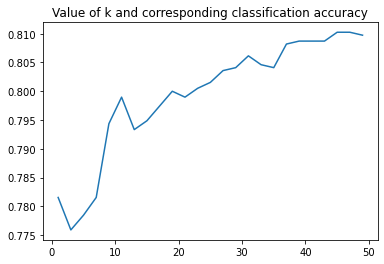

In [14]:
results = pd.DataFrame(results, columns=["k", "accuracy"])
plt.plot(results.k, results.accuracy)
plt.title("Value of k and corresponding classification accuracy")
plt.show()

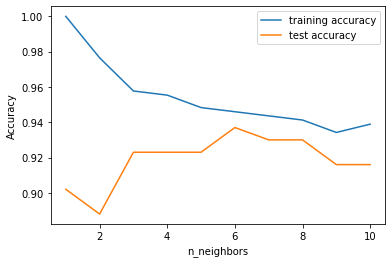

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
 # build the model
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # record training set accuracy
 training_accuracy.append(clf.score(X_train, y_train))
 # record generalization accuracy
 test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
